In [ ]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

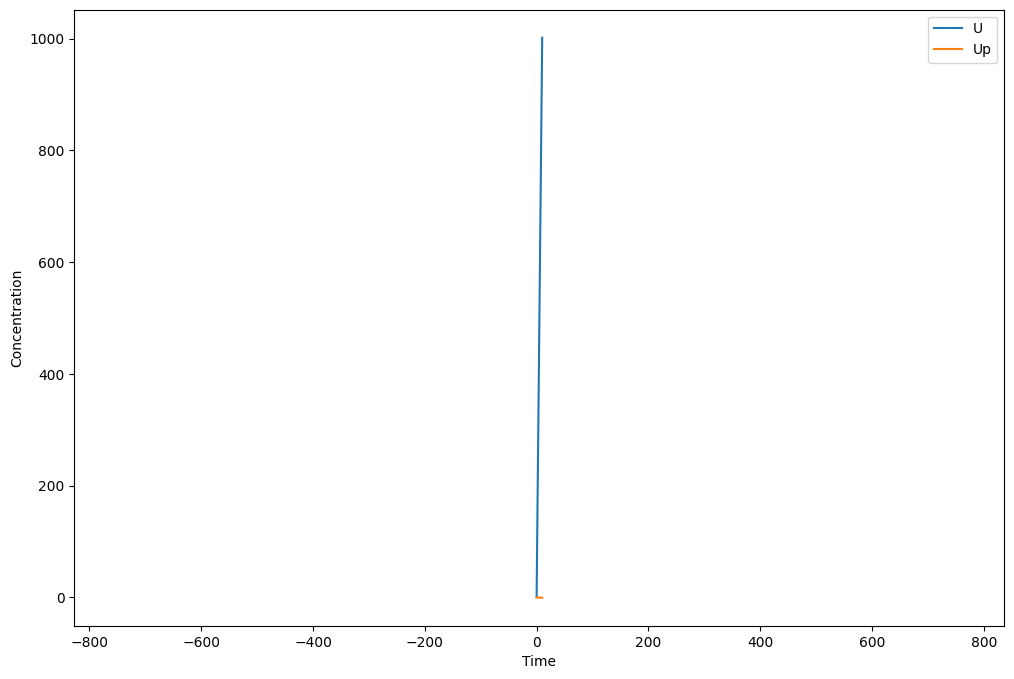

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

r1 = 0.1
r2 = 0.2
k1 = 10**2
k2 = k1
Et = 0.001
Dt = 0.001
U0 = 1
Up0 = 0.00001


def equations(t, y):
    U, Up = y
    Ut = U + Up
    u = r1 * Et
    v = r2 * Dt
    k = k2 / Ut
    J = k1 / Ut
    G = (2 * u * k) / v - u + v * J + u * k + np.sqrt((v - u + v * J + u * k) ** 2 - (4 * (v - u) * u * k))
    dUdt = r2 * Dt * (Ut - U) / (k2 * (Ut - U)) - r1 * Et * (Up / k2 + U)
    dUpdt = Ut * G
    return [dUpdt, dUdt]


sol = solve_ivp(equations, [0, 10], [U0, Up0], t_eval=np.linspace(0, 10, 1000))

fig = plt.figure(figsize=(12, 8))
#plt.xscale('log')
plt.plot(sol.t, sol.y[0], label='U')
plt.plot(sol.t, sol.y[1], label='Up')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
#plt.xlim(10**-2, 10**2)
#plt.ylim(0,1)
plt.axis('equal')
plt.show()


In [ ]:
def Goldbeter_Koshland(u, k, v, J):
    u = r1*Et
    v = r2*Dt
    k = k2/Ut
    J = k1/Ut
    G = (2*u*k)/v-u+v*J+u*k+sqrt((v-u+v*J+u*k)**2-4*(v-u)*u*k)
    return equilibrium

def model(U, Up, t):
    dUdt = r2*Dt*(Ut-U)/(k2(Ut-U))-r1*Et*(Up/k2+U)
    dUpdt = Ut*G
    return

In [ ]:
k1=(d1+r1)/a1
k2=(d2+r2)/a2

EU=Et*(U/(k2+U))
DU=Dt*(Up/(k2+Up))


NameError: name 'd1' is not defined

In [ ]:
k0,k1,k2,k3,k4,J3,J4 = 0.4,0.01,1,1,0.2,0.05,0.05
def Goldbeter_Koshland(v1,v2,J1,J2):
    A = r1*Et-r2*Dt
    B = r2*Dt*(1+(k1/Ut))+r1*Et((k2/Ut)-1)
    C = r1*Et*(k2/Ut)
    equilibrium = (2*C)/(2*A*(-B))
    return equilibrium

def model(R,t,S):
    Up = Ut * Goldbeter_Koshland(k3*R,k4,J3,J4)
    dUdt = r2*Dt*(Ut+U)/(k2(Ut-U))-r1*Et*(Up/k2)
    return dRdt

t = np.linspace(0,10,100)
result = odeint(model,y0=1,t=t,args=(0,))

In [ ]:
# rate curve
R = np.linspace(0,0.7,100)
S_options = [0,8,16]
fig,ax = plt.subplots()
for S in S_options:
    removal_rate = k2*R
    EP = Goldbeter_Koshland(k3*R,k4,J3,J4)
    production_rate = k0*EP+k1*S
    ax.plot(R,removal_rate,c='k',linestyle='-')
    ax.plot(R,production_rate,c='k',linestyle='--')
ax.set_xlim(0,0.7)
ax.set_xlabel('R')
ax.set_ylim(0,0.6)
ax.set_ylabel('Rate')



In [ ]:
S_options = np.linspace(0,15,100)
def equation(R,S):
    EP = Goldbeter_Koshland(k3*R,k4,J3,J4)
    return k0*EP + k1*S - k2*R
fig,ax = plt.subplots()
store_uplimb,store_downlimb = [],[]
for S in S_options:
    R_ss_uplimb = fsolve(func=equation,x0=[1],args=(S,))[0]
    R_ss_downlimb = fsolve(func=equation,x0=[0],args=(S,))[0]
    store_uplimb.append(R_ss_uplimb)
    store_downlimb.append(R_ss_downlimb)
ax.plot(S_options,store_uplimb)
ax.plot(S_options,store_downlimb)



R = np.linspace(-1,2,10000)
result = equation(R,S=5)
fig,ax = plt.subplots()
ax.plot(R,result)
ax.axhline(0,linestyle='--',c='k')

fsolve(func=equation,x0=[0.0],args=(5,))